In [47]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Lattice, Structure
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

1)Téléchargement de la structure de bande du ScAgO2_mp-973185_symmetrized

In [48]:
with MPRester("FmqEv0sKnKuZGoTP5sb8") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-973185")
    # Dos for material id
    dos = m.get_dos_by_material_id("mp-973185")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-973185")
    view=quick_view(structure)
    display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

2) Déterminer la bande interdite

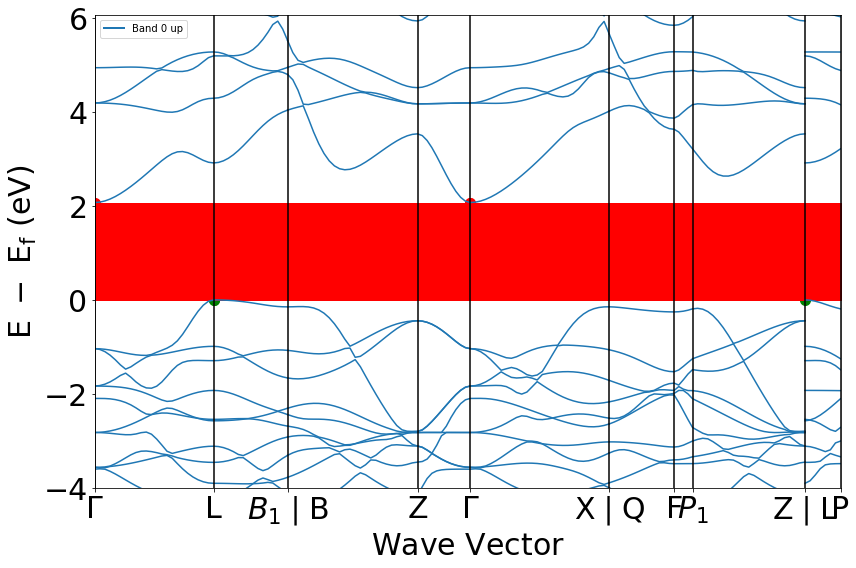

In [189]:
#plot de la structure de bandes
figure_band_gap= BSPlotter(bandstructure)
#plot normal sans la bande en couleur: figure_band_gap.show()
data = figure_band_gap.bs_plot_data()

vbms = data.get('vbm')
cbms = data.get('cbm')
distance = data['ticks']['distance']
distances = data.get('distances')
energie = data['energy']
figure_band_gap.get_plot(vbm_cbm_marker=True)
bandgap = bandstructure.get_band_gap()
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'red')

In [165]:
#caractéristiques 
band_gap = bandstructure.get_band_gap()
print ("Les caractéristiques de la bande interdite", '\n')
print("La bande interdite directe : ", band_gap['direct'])
print("La bande interdite métallique :", figureBand.bs_plot_data().get("is_metal"))
print("L'energie de la bande interdite est :", band_gap['energy'], 'eV') 
print("Le vecteur d'onde se déplace dans la direction :", band_gap['transition'])
print("L'énergie de Fermi : ", bandstructure.efermi, 'eV')

Les caractéristiques de la bande interdite 

La bande interdite directe :  False
La bande interdite métallique : False
L'energie de la bande interdite est : 2.074 eV
Le vecteur d'onde se déplace dans la direction : L-\Gamma
L'énergie de Fermi :  2.07919857 eV


3)Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

Le plus (ou le moins) de dispersion pour la bande de valence(ou de conduction) représente la plus grande(petite) pente entre 2 k-points. Pour commencer, nous allons déterminer la dernière bande de valence ainsi que la première bande de conduction.

In [171]:
bande_de_valence = bandstructure.get_vbm()
print(bande_de_valence.get('band_index'))
print("La dernière bande de valence est donc la bande 16.\n")
bande_de_conduction = bandstructure.get_cbm()
print(bande_de_conduction.get('band_index'))
print("La première bande de conduction est donc la bande 17.\n")
print("Nous pouvions également le vérifier sur materials project")

defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La dernière bande de valence est donc la bande 16.

defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
La première bande de conduction est donc la bande 17.

Nous pouvions également le vérifier sur materials project


Ensuite, si l'on observe les valeurs de distance, on peut voir qu'il y en a plusieurs qui sont répétitives.

In [172]:
distance_simple = distance

for i in range(np.size(distance)-1) :
    if distance_simple[i] == distance_simple[i-1] :
        del distance_simple[i]

Ici, on renvoit un tableau pour chaque intervalle entre 2 kpoints. Plus précisément, on calcule la pente pour la bande de valence(ou de conduction) selon l'énergie par rapport à la distance. Parmi toutes les pentes calculées, nous choisissons le maximum et le minimum pour la dernière bande de valence et la première bande de conduction.

In [168]:
def slope(x,y):
	print (np.array([abs((y[-1]-y[0])/(x[-1]-x[0]))]))#,x[0],y[0],x[-1]-x[0],y[-1]-y[0]]))

Les valeurs pour la dernière bande de valence sont:

Le maximum : 1.1854884204706715
Le minimum : 0.17641839567997858


Les valeurs pour la dernière bande de conduction sont:

Le maximum : 2.916453090939204
Le minimum : 0.29780965132852716


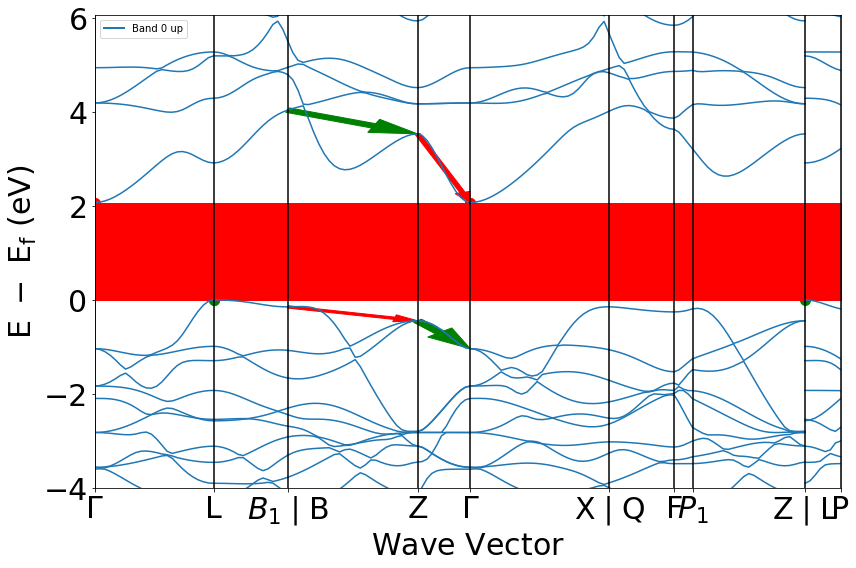

In [186]:

pente_valence = np.zeros(np.size(distance_simple)-1)
pente_conduction = np.zeros(np.size(distance_simple)-1)

for i in range(np.size(distance)-1) : 
    pente_valence[i] = (energie["1"][i][16][-1] - energie["1"][i][16][0])/(distance_simple[i+1]-distance_simple[i])
    pente_conduction[i] = (energie["1"][i][17][-1] - energie["1"][i][17][0])/(distance_simple[i+1]-distance_simple[i])

maxV = np.max(abs(pente_valence))
minV = np.min(abs(pente_valence))
maxC = np.max(abs(pente_conduction))
minC = np.min(abs(pente_conduction))
print("Les valeurs pour la dernière bande de valence sont:\n")
print("Le maximum :", maxV)
print("Le minimum :", minV)
print("\n")
print("Les valeurs pour la dernière bande de conduction sont:\n")
print("Le maximum :" ,maxC)
print("Le minimum :" ,minC)

figure_band_gap.get_plot(vbm_cbm_marker=True)
plt.arrow(distance[2], energie["1"][2][17][0], distance[3]-distance[2], energie["1"][2][17][-1]-energie["1"][2][17][0], color ='green', width = 0.1, length_includes_head = True)
plt.arrow(distance[3], energie["1"][3][17][0], distance[4]-distance[3], energie["1"][3][17][-1]-energie["1"][3][17][0], color = 'r', width = 0.05, length_includes_head = True)
plt.arrow(distance[3], energie["1"][3][16][0], distance[4]-distance[3], energie["1"][3][16][-1]-energie["1"][3][16][0], color = 'green', width = 0.1, length_includes_head = True)
plt.arrow(distance[2], energie["1"][2][16][0], distance[3]-distance[2], energie["1"][2][16][-1]-energie["1"][2][16][0], color = 'r', width = 0.05, length_includes_head = True)
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'red')

4) La masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique


Pour obtenir la masse effective $m^*$, nous utilisons :$$
m^*=\frac{\hbar^2}{\frac{\partial^2 E}{\partial k^2}}
$$Pour prendre en compte la supposition de dispersion parabolique, nous pouvons approximé par:$$
E(k)-E_0 = \frac{\hbar^2}{2m^*}k^2 \Rightarrow m^* = \frac{\hbar^2 k^2}{2E}
$$

In [180]:

h = 6.582119570 * 1e-16 
Evbm = vbm['energy']
Ecbm = cbm['energy']

a = 3.128674875
k = 2 * np.pi / a 

masse_effective_bande_valence = (h**2 * (k**2))/(2*Evbm)
masse_effective_bande_conduction = (h**2 * (k**2))/(2*Ecbm)

print('La masse effective au sommet de la dernière bande de valence est  :', masse_effective_bande_valence, 'kg')
print('La masse effective à la base de la première bande de conduction est : ', masse_effective_bande_conduction, 'kg')



La masse effective au sommet de la dernière bande de valence est  : 4.412849201671926e-31 kg
La masse effective à la base de la première bande de conduction est :  2.155152905784716e-31 kg


Le plot de la dernière(première) bande de valence(conduction) en supposant une dispersion parabolique


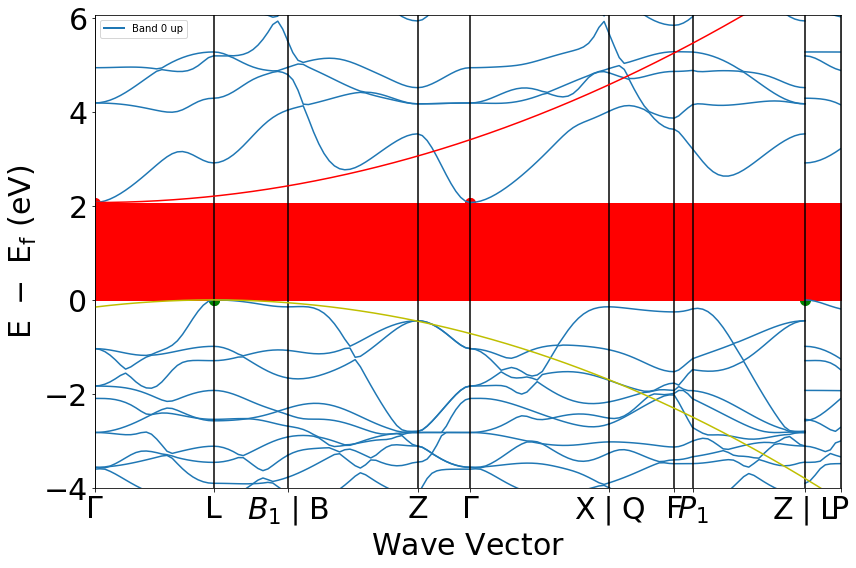

In [190]:
print("Le plot de la dernière(première) bande de valence(conduction) en supposant une dispersion parabolique")


Sommet1 = vbms[0]
Sommet1bis = [distances[3][3],energie["1"][3][16][3]] 

Sommet2 = vbms[2]
x1,y1=Sommet1[0],Sommet1[1]
x2,y2=Sommet1bis[0],Sommet1bis[1]

aVal = y2/((x2-x1)**2)
zVal = np.arange(0,10,0.01)
yVal = aVal*((zVal-x1)**2) + y1



Base1 = cbms[0]
Base1bis = [distances[6][3],energie["1"][6][17][3]]
x3,y3=Base1[0],Base1[1]
x4,y4=Base1bis[0],Base1bis[1]

aCond = y4/((x4-x3)**2)
zCond = np.arange(0,10,0.01)
yCond = aCond*((zCond-x3)**2)+y3

figure_band_gap.get_plot(vbm_cbm_marker=True)
plt.plot(zVal,yVal,'y')
plt.plot(zCond,yCond,'r')
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'red')